In [1]:
import pandas as pd

demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1],
                      'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
display(demo_df)

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [3]:
pd.get_dummies(demo_df)

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [3]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature'])

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import mglearn

X, y = mglearn.datasets.make_wave(n_samples=100)

In [4]:
import numpy as np

line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

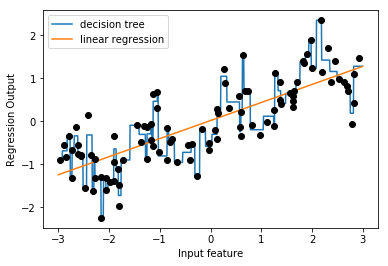

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt


reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")

plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel("Regression Output")
plt.xlabel('Input feature')
plt.legend(loc="best")

In [8]:
# define 10 bins equally from -3 to 3
bins = np.linspace(-3, 3, 11)
print("bins: {}".format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [9]:
which_bin = np.digitize(X, bins=bins)
print("\nData points:\n", X[:5])
print("\nBin memebership for data points:\n", which_bin[:5])


Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin memebership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [10]:
from sklearn.preprocessing import OneHotEncoder
# transform using OneHotEncoder
encoder = OneHotEncoder(sparse=False)
# finds the unique values that appear in which_bin
encoder.fit(which_bin)
# transform
X_binned = encoder.transform(which_bin)
print("shape of X_binned: {}".format(X_binned.shape))
print(X_binned[:5])

shape of X_binned: (100, 10)
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


C:\Users\yue.yuan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


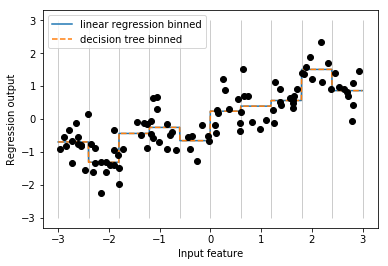

In [11]:
# build models on one hot encoded data
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned', linestyle='dashed')

plt.plot(X[:,0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc='best')

In [21]:
# add original feature to add slope to linear model
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)
print(X_combined[:5])

(100, 11)
[[-0.75275929  0.          0.          0.          1.          0.
   0.          0.          0.          0.          0.        ]
 [ 2.70428584  0.          0.          0.          0.          0.
   0.          0.          0.          0.          1.        ]
 [ 1.39196365  0.          0.          0.          0.          0.
   0.          0.          1.          0.          0.        ]
 [ 0.59195091  0.          0.          0.          0.          0.
   1.          0.          0.          0.          0.        ]
 [-2.06388816  0.          1.          0.          0.          0.
   0.          0.          0.          0.          0.        ]]


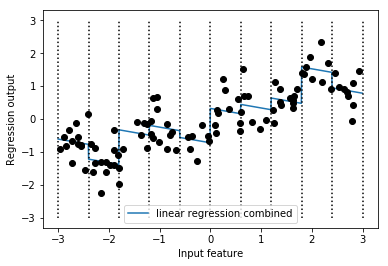

In [26]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
    
plt.xlabel('Input feature')
plt.ylabel('Regression output')
plt.legend(loc='best')
plt.plot(X[:,0], y, 'o', c='k')

In [37]:
# to get seperate slope in each bin, use interaction
X_product = np.hstack([X_binned, X*X_binned])
print(X_product.shape)

(100, 20)


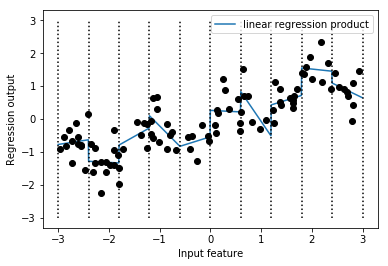

In [39]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
    
plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [27]:
# polynomial features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [28]:
print('X_poly shapes: {}'.format(X_poly.shape))
print('X: \n{}'.format(X[:5]))
print('poly X: \n{}'.format(X_poly[:5]))

X_poly shapes: (100, 10)
X: 
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
poly X: 
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [30]:
print('polynomial feature names: \n{}'.format(poly.get_feature_names()))

polynomial feature names: 
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


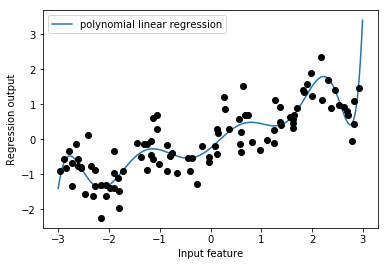

In [40]:
# polynomial regression
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

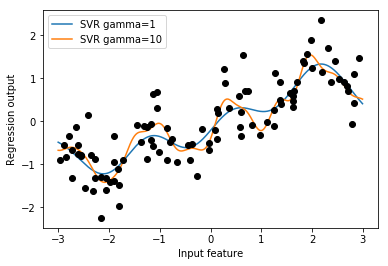

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

# use kernel SVM, do not need to transform features
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
    
plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc='best')

In [30]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

# rescale data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
from sklearn.preprocessing import PolynomialFeatures

# extract polynomial features
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [33]:
print("Polynomial feature names: \n{}".format(poly.get_feature_names()))

Polynomial feature names: 
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [34]:
# compare the performace w/ and w/o interactions
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("scores without interactions: {:.3f}".format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("scores with interactions: {:.3f}".format(ridge.score(X_test_poly, y_test)))

scores without interactions: 0.621
scores with interactions: 0.753


In [37]:
# use random forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("Scores without interactions: {:.3f}".format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Scores with interactions: {:.3f}".format(rf.score(X_test_poly, y_test)))

Scores without interactions: 0.791
Scores with interactions: 0.746


In [1]:
import numpy as np

rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10*np.exp(X_org))
y = np.dot(X_org, w)

In [44]:
print(X.shape)
print(y.shape)

(1000, 3)
(1000,)


In [2]:
print("Number of feature appearances:\n{}".format(np.bincount(X[:,0])))

Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5,0,'Value')

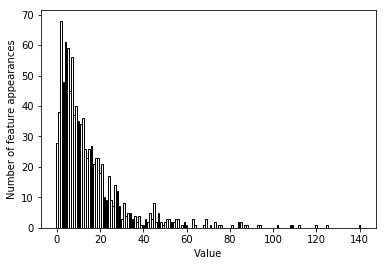

In [59]:
# visualize it
bins = np.bincount(X[:,0])
plt.bar(range(len(bins)), bins, color='w', edgecolor='k')
plt.ylabel("Number of feature appearances")
plt.xlabel("Value")

Text(0.5,0,'values')

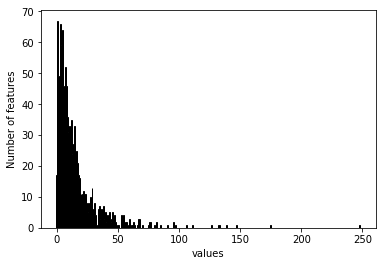

In [65]:
bins = np.bincount(X[:,1])
plt.bar(range(len(bins)), bins, color='w', edgecolor='k')
plt.ylabel("Number of features")
plt.xlabel("values")

Text(0.5,0,'Values')

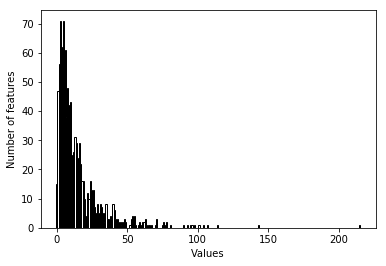

In [66]:
bins = np.bincount(X[:,2])
plt.bar(range(len(bins)), bins, color='w', edgecolor='k')
plt.ylabel("Number of features")
plt.xlabel("Values")

In [67]:
# fit ridge regression for poisson
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


In [68]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5,0,'Value')

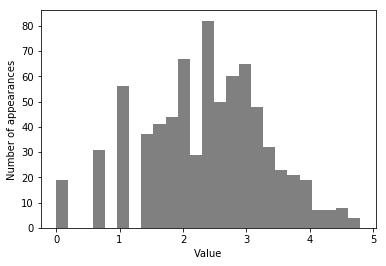

In [73]:
# check the transformed data
plt.hist(X_train_log[:,0], bins=25, color='grey')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [74]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Score: {:.3f}".format(score))b

Score: 0.875


In [1]:
# feature selection
# univariate statistics
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split
import numpy as np

cancer = load_breast_cancer()

# get random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
print(noise.shape)

(569, 50)


In [5]:
# add noise to data
# The first 30 are from cancer data, next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)
#select 50% of features
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# transform training set
X_train_selected = select.transform(X_train)
print("X_train shape:{}".format(X_train.shape))
print("X_train_selected shape: {}".format(X_train_selected.shape))

X_train shape:(284, 80)
X_train_selected shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5,0,'sample index')

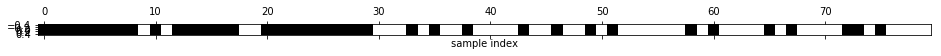

In [79]:
# which features are selected
mask = select.get_support()
print(mask)
# visualize mask
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("sample index")

In [81]:
# compare performance in logistic regression
from sklearn.linear_model import LogisticRegression

# transform test data
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Scores with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Scores with selected features: {:.3f}".format(lr.score(X_test_selected, y_test)))

Scores with all features: 0.930
Scores with selected features: 0.940


C:\Users\yue.yuan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yue.yuan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [82]:
# model-based feature selection
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold="median")

In [83]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train shape: {}".format(X_train.shape))
print("X_train_l1 shape: {}".format(X_train_l1.shape))

X_train shape: (284, 80)
X_train_l1 shapeL (284, 40)


Text(0.5,0,'Sample index')

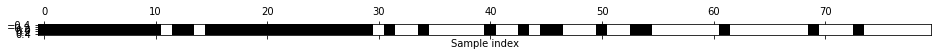

In [84]:
# features that were selected
mask = select.get_support()
# visualize it
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

In [86]:
# performance
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.951


C:\Users\yue.yuan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5,0,'Sample index')

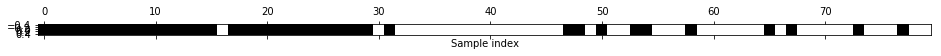

In [6]:
# iterative feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline

select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)

select.fit(X_train, y_train)
# visualize the selected features
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel("Sample index")

In [6]:
from sklearn.linear_model import LogisticRegression

# test the accuracy
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.951


C:\Users\yue.yuan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [7]:
# use selected features inside RFE
print("Test score: {:.3f}".format(select.score(X_test, y_test)))

Test score: 0.951


In [2]:
import mglearn

citibike = mglearn.datasets.load_citibike()
print("Citi bike data: \n{}".format(citibike.head()))

Citi bike data: 
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


Text(0,0.5,'Rentals')

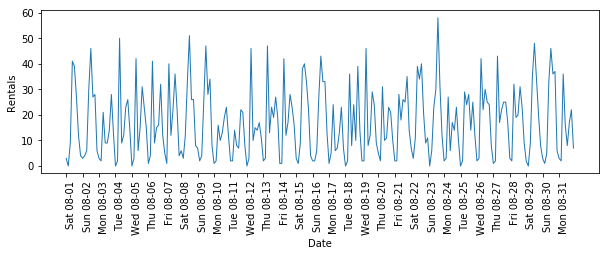

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# visualize the rental frequencies
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha='left')
plt.plot(citibike, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")

In [8]:
y = citibike.values
# convert the time to POSIX time
X = np.array([item.timestamp() for item in citibike.index.to_pydatetime()]).astype("int").reshape(-1, 1)

In [5]:
n_train = 184

# function to evaluate and plot a regressor
def eval_on_feature(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("Test score: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))
    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90, ha='left')
    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, n_train + len(y_test)), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="prediction train")
    plt.plot(range(n_train, n_train + len(y_test)), y_pred, '--', label="prediction test")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")

Test score: -0.04


<Figure size 432x288 with 0 Axes>

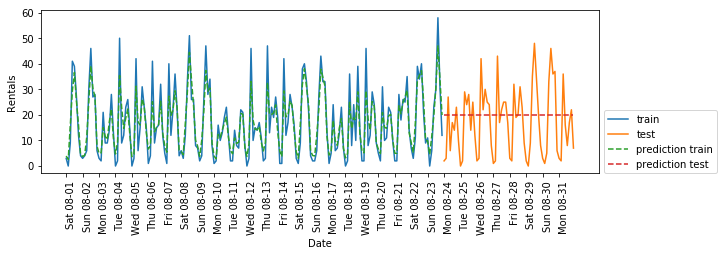

In [10]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
plt.figure()
eval_on_feature(X, y, regressor)

Test score: 0.60


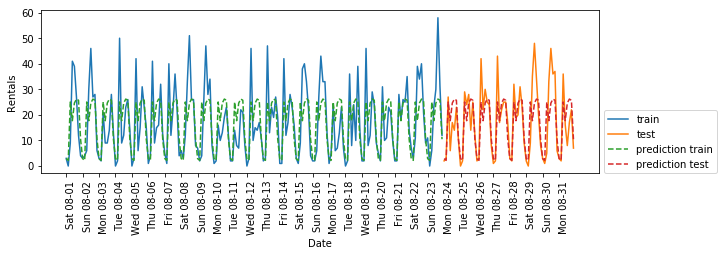

In [63]:
# use hour of the day, prediction have the same pattern for each day
X_hour = np.array(citibike.index.hour).reshape(-1, 1)
eval_on_feature(X_hour, y, regressor)

Test score: 0.84


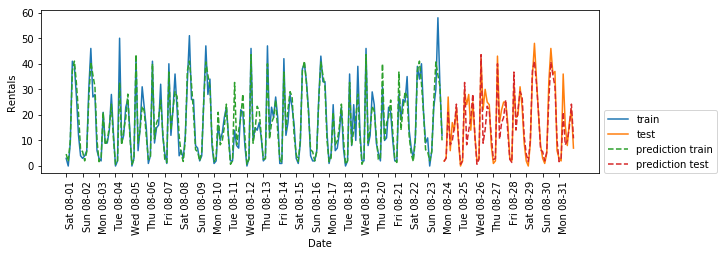

In [11]:
# add the day of the week to illustrate weekly pattern
X_hour_week = np.hstack([np.array(citibike.index.dayofweek).reshape(-1, 1), np.array(citibike.index.hour).reshape(-1,1)])
eval_on_feature(X_hour_week, y, regressor)

Test score: 0.13


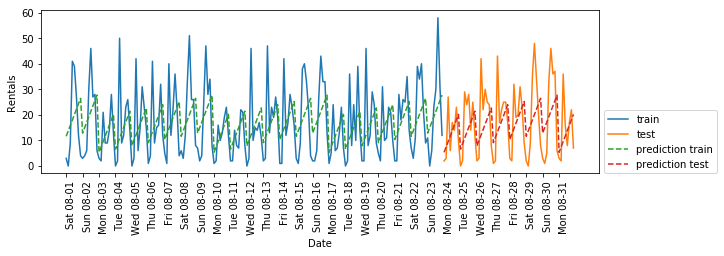

In [66]:
# use linear regression
from sklearn.linear_model import LinearRegression
eval_on_feature(X_hour_week, y, LinearRegression())

In [12]:
from sklearn.preprocessing import OneHotEncoder
# transform integers as categorical
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()
print("hour week: {}".format(X_hour_week[:5,]))
print("hour week onehot: {}".format(X_hour_week_onehot[:5,]))

hour week: [[ 5  0]
 [ 5  3]
 [ 5  6]
 [ 5  9]
 [ 5 12]]
hour week onehot: [[0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


C:\Users\yue.yuan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Test score: 0.62


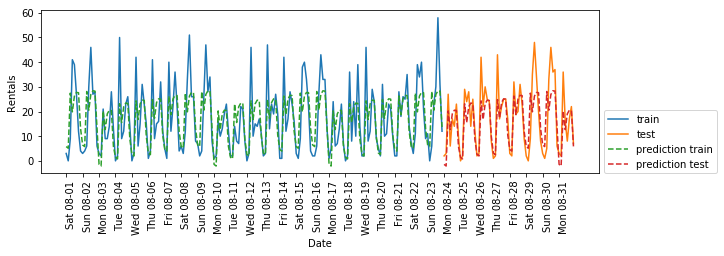

In [22]:
from sklearn.linear_model import Ridge
eval_on_feature(X_hour_week_onehot, y, Ridge())

(248, 120)
(248, 15)
Test score: 0.85


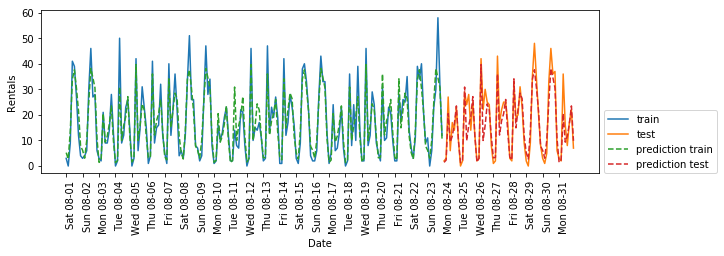

In [13]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
# use interaction
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
print(X_hour_week_onehot_poly.shape)
print(X_hour_week_onehot.shape)
lr = Ridge()
eval_on_feature(X_hour_week_onehot_poly, y, lr)

In [15]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features = day + hour
features_poly = poly_transformer.get_feature_names(features)
#print(features_poly)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
print(features_nonzero)
coef_nonzero = lr.coef_[lr.coef_ != 0]

['Mon' 'Tue' 'Wed' 'Thu' 'Fri' 'Sat' 'Sun' '00:00' '03:00' '06:00' '09:00'
 '12:00' '15:00' '18:00' '21:00' 'Mon 00:00' 'Mon 03:00' 'Mon 06:00'
 'Mon 09:00' 'Mon 12:00' 'Mon 15:00' 'Mon 18:00' 'Mon 21:00' 'Tue 00:00'
 'Tue 03:00' 'Tue 06:00' 'Tue 09:00' 'Tue 12:00' 'Tue 15:00' 'Tue 18:00'
 'Tue 21:00' 'Wed 00:00' 'Wed 03:00' 'Wed 06:00' 'Wed 09:00' 'Wed 12:00'
 'Wed 15:00' 'Wed 18:00' 'Wed 21:00' 'Thu 00:00' 'Thu 03:00' 'Thu 06:00'
 'Thu 09:00' 'Thu 12:00' 'Thu 15:00' 'Thu 18:00' 'Thu 21:00' 'Fri 00:00'
 'Fri 03:00' 'Fri 06:00' 'Fri 09:00' 'Fri 12:00' 'Fri 15:00' 'Fri 18:00'
 'Fri 21:00' 'Sat 00:00' 'Sat 03:00' 'Sat 06:00' 'Sat 09:00' 'Sat 12:00'
 'Sat 15:00' 'Sat 18:00' 'Sat 21:00' 'Sun 00:00' 'Sun 03:00' 'Sun 06:00'
 'Sun 09:00' 'Sun 12:00' 'Sun 15:00' 'Sun 18:00' 'Sun 21:00']


Text(0,0.5,'Feature magnitude')

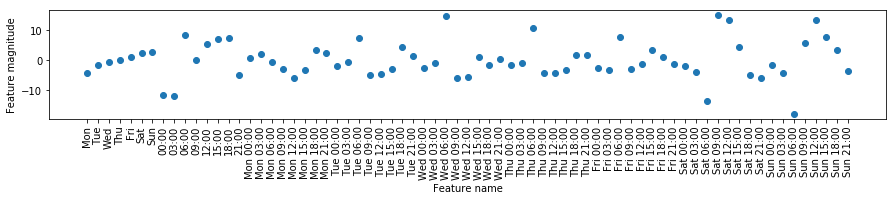

In [16]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("Feature name")
plt.ylabel("Feature magnitude")